<a href="https://colab.research.google.com/github/karthiksamula134/SHOREFEST-2025/blob/main/SHORE_FEST_HACKATHON(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predictive Analytics for Price Stabilization of Essential
Commodities using AI/ML**


**Description:**
Develop an Al/ML-based platform that forecasts
the prices of essential food commodities, such as pulses and
onions, using historical data, seasonal trends, and real-time
market inputs. The platform will employ advanced machine
learning models, like ARIMA or LSTM, to predict price
fluctuations and recommend strategic market interventions for
stabilizing prices.



**Objective:**
Create a system that analyzes historical price
trends, seasonal patterns, crop production estimates, and
market intelligence to predict price changes. The platform
should provide actionable insights for timely market
interventions, including the release of buffer stocks, to
stabilize prices, Potential Impact: The AI/ML platform will
enhance decision-making by providing accurate price
predictions and market outlooks, supporting the Department
of Consumer Affairs in managing price volatility. It will
contribute to more efficient market interventions, reducing
food price instability, supporting farmers, and ensuring food
security for consumers.

**INSTALLING NECESSARY PACKAGES:**

In [ ]:
!pip install pandas numpy matplotlib statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor # didn't use since worked with random forest
from sklearn.metrics import mean_squared_error
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
!pip install seaborn sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**LOADING THE DATASET :**

In [ ]:
file_path = '/content/food_prices.csv'  # Adjust the path if needed
data = pd.read_csv(file_path, encoding='latin1')

print("\nSample Data:")
print(data.head())


Sample Data:
   adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id cm_name  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   

   cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  mp_year  mp_price  \
0      87      AFN     15  Retail      5      KG         1     2014      50.0   
1      87      AFN     15  Retail      5      KG         2     2014      50.0   
2      87      AFN     15  Retail      5      KG         3     2014      50.0   
3      87      AFN     15  Retail      5      KG         4     2014      50.0   
4      87      AFN     15  Retail      5      KG         5     2014      50.0   

  mp_commodi

**DATA CLEANING :**

In [ ]:
# Handle Missing Values
cleaned_data = data.dropna()

# Ensure numeric columns are properly formatted
numeric_columns = ['mp_price']
for col in numeric_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

# Combine `mp_month` and `mp_year` into a Date column
cleaned_data['Date'] = pd.to_datetime(
    cleaned_data['mp_year'].astype(str) + '-' + cleaned_data['mp_month'].astype(str) + '-01',
    errors='coerce'
)

<ipython-input-7-413659157429>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')
<ipython-input-7-413659157429>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(


In [ ]:
# Remove Unnecessary Columns
columns_to_keep = [
    'adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
    'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name',
    'um_id', 'um_name', 'Date', 'mp_price', 'mp_commoditysource'
]
cleaned_data = cleaned_data[columns_to_keep]

# Handle Duplicates
cleaned_data = cleaned_data.drop_duplicates()

# Reset Index
cleaned_data = cleaned_data.reset_index(drop=True)

print("\nSample Cleaned Data:")
print(cleaned_data.head())


Sample Cleaned Data:
   adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id cm_name  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   

   cur_id cur_name  pt_id pt_name  um_id um_name       Date  mp_price  \
0      87      AFN     15  Retail      5      KG 2014-01-01      50.0   
1      87      AFN     15  Retail      5      KG 2014-02-01      50.0   
2      87      AFN     15  Retail      5      KG 2014-03-01      50.0   
3      87      AFN     15  Retail      5      KG 2014-04-01      50.0   
4      87      AFN     15  Retail      5      KG 2014-05-01      50.0   

  mp_commoditysource  
0                WFP  
1     

In [ ]:
# Save cleaned data
cleaned_data.to_csv('/content/cleaned_food_prices.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_food_prices.csv'.")


Cleaned dataset saved as 'cleaned_food_prices.csv'.


**EXPLORATORY DATA ANALYSIS :**

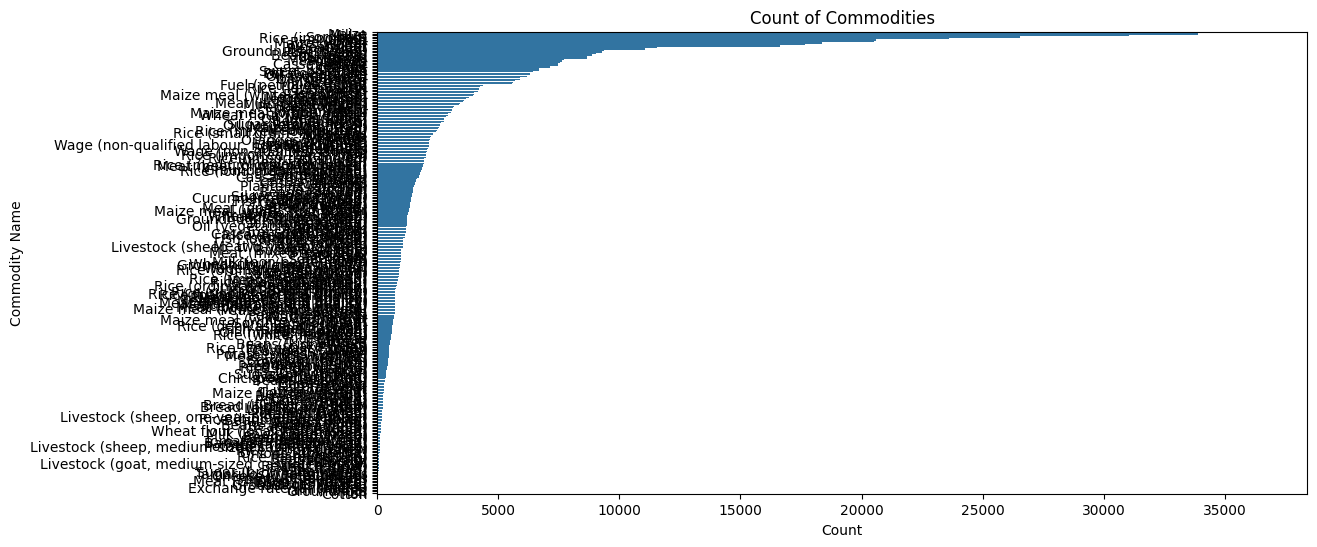

<ipython-input-10-4cfe3714d455>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


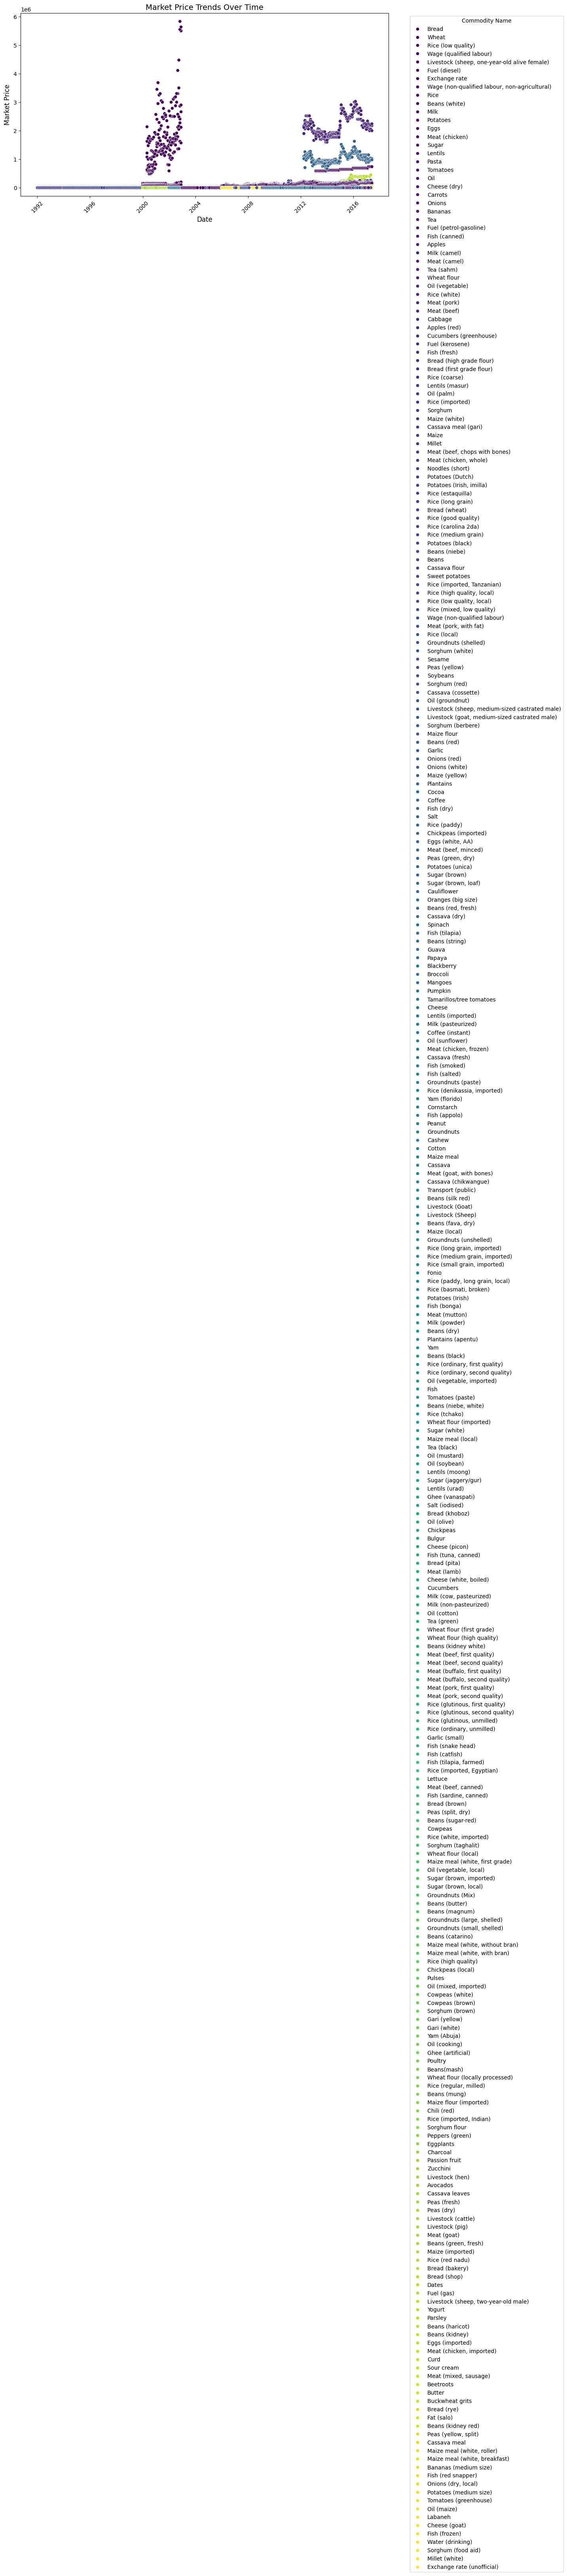

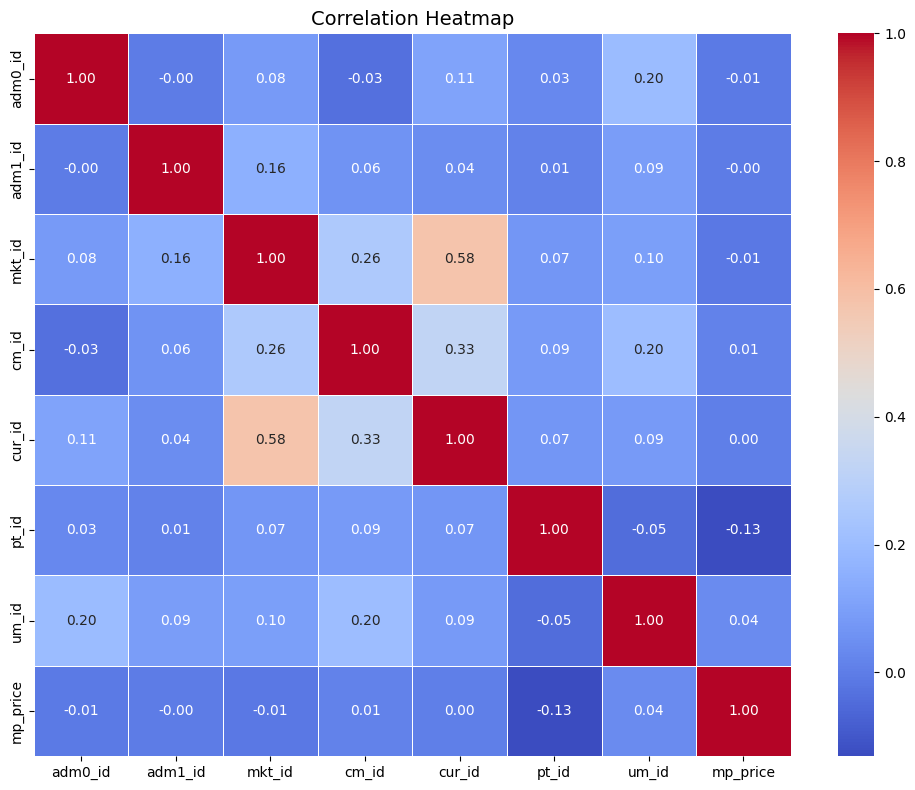

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Univariate Analysis

# Countplot for a categorical feature, i.e, commodity name
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, y='cm_name', order=cleaned_data['cm_name'].value_counts().index)
plt.title('Count of Commodities')
plt.ylabel('Commodity Name')
plt.xlabel('Count')
plt.show()

# Bivariate Analysis

# 'Date' column
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')

# Scatter plot of price over time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='Date', y='mp_price', hue='cm_name', palette='viridis')
plt.title('Market Price Trends Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Price', fontsize=12)
plt.legend(title='Commodity Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter numeric columns for correlation
numeric_columns = cleaned_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



**DATA TRANFORMATION :**

In [ ]:
# Scaling Numerical Features
numerical_features = ['mp_price']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
cleaned_data[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])


categorical_features = ['adm0_name', 'adm1_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name', 'um_name']

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    label_encoders[col] = le

# Feature Engineering
# Creating new column quarter, based on the Date column
cleaned_data['Quarter'] = cleaned_data['Date'].dt.quarter


print("\nTransformed Data Overview:")
print(cleaned_data.head())

transformed_file_path = '/content/transformed_food_prices.csv'
cleaned_data.to_csv(transformed_file_path, index=False)
print(f"\nTransformed dataset saved as '{transformed_file_path}'.")


Transformed Data Overview:
   adm0_id  adm0_name  adm1_id  adm1_name  mkt_id  mkt_name  cm_id  cm_name  \
0        1          0      272         71     266       411     55       29   
1        1          0      272         71     266       411     55       29   
2        1          0      272         71     266       411     55       29   
3        1          0      272         71     266       411     55       29   
4        1          0      272         71     266       411     55       29   

   cur_id  cur_name  pt_id  pt_name  um_id  um_name       Date  mp_price  \
0      87         0     15        2      5       46 2014-01-01  0.000009   
1      87         0     15        2      5       46 2014-02-01  0.000009   
2      87         0     15        2      5       46 2014-03-01  0.000009   
3      87         0     15        2      5       46 2014-04-01  0.000009   
4      87         0     15        2      5       46 2014-05-01  0.000009   

  mp_commoditysource  Quarter  
0       

**Feature Engineering:**

In [ ]:
from pandas.tseries.offsets import DateOffset

# Adding Seasonal Indicators
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['Is_Harvest_Season'] = cleaned_data['Month'].isin([9, 10, 11]).astype(int)  # Months for harvest
cleaned_data['Is_Planting_Season'] = cleaned_data['Month'].isin([3, 4, 5]).astype(int)  # Months for planting

# Adding Historical Features
for lag in [1, 3, 6]:  # Lags of 1, 3, and 6 months
    cleaned_data[f'mp_price_lag_{lag}'] = cleaned_data.sort_values(by='Date').groupby(['adm0_name', 'mkt_name'])['mp_price'].shift(lag)


print("\nEnhanced Data Overview:")
print(cleaned_data.head())

enhanced_file_path = '/content/enhanced_food_prices.csv'
cleaned_data.to_csv(enhanced_file_path, index=False)
print(f"\nEnhanced dataset saved as '{enhanced_file_path}'.")



Enhanced Data Overview:
   adm0_id  adm0_name  adm1_id  adm1_name  mkt_id  mkt_name  cm_id  cm_name  \
0        1          0      272         71     266       411     55       29   
1        1          0      272         71     266       411     55       29   
2        1          0      272         71     266       411     55       29   
3        1          0      272         71     266       411     55       29   
4        1          0      272         71     266       411     55       29   

   cur_id  cur_name  ...       Date  mp_price  mp_commoditysource  Quarter  \
0      87         0  ... 2014-01-01  0.000009                 WFP        1   
1      87         0  ... 2014-02-01  0.000009                 WFP        1   
2      87         0  ... 2014-03-01  0.000009                 WFP        1   
3      87         0  ... 2014-04-01  0.000009                 WFP        2   
4      87         0  ... 2014-05-01  0.000009                 WFP        2   

  Month  Is_Harvest_Season Is_P

In [ ]:
enhanced_file_path = '/content/enhanced_food_prices.csv'
cleaned_data = pd.read_csv(enhanced_file_path, parse_dates=['Date'])

**ARIMA MODEL :**

In [ ]:
# Filter and prepare the data

# OLD CODE: (NOT GREAT ACCURACY)

ts_data = cleaned_data[['Date', 'mp_price']].dropna()
ts_data.set_index('Date', inplace=True)
ts_data = ts_data['mp_price']

# Split data into training and testing sets
train_size = int(len(ts_data) * 0.6)
train, test = ts_data[:train_size], ts_data[train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(4, 2, 0))
arima_result = arima_model.fit()


test = test.values

# Evaluation
predictions = arima_result.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"ARIMA RMSE: {rmse}")

#Predictions
print(predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

ARIMA RMSE: 0.020407881359594326
437979    0.000013
437980    0.000014
437981    0.000014
437982    0.000014
437983    0.000014
            ...   
729960    0.036148
729961    0.036148
729962    0.036148
729963    0.036148
729964    0.036148
Name: predicted_mean, Length: 291986, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"ARIMA RMSE: {rmse}")

# Mean Absolute Error
mae = mean_absolute_error(test, predictions)
print(f"ARIMA MAE: {mae}")

# Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(test, predictions)
print(f"ARIMA MAPE: {mape}")


ARIMA RMSE: 0.020407881359594326
ARIMA MAE: 0.017530354901810742
ARIMA MAPE: 4652013284.427078


ARIMA RMSE: 0.00011746711453533055
ARIMA MAE: 0.0001002081415811493
ARIMA MAPE: 0.122009844215083
              Actual  Predicted
Date                           
2012-05-01  0.000771   0.000747
2012-06-01  0.000766   0.000702
2012-07-01  0.000766   0.000722
2012-08-01  0.000781   0.000703
2012-09-01  0.000778   0.000722


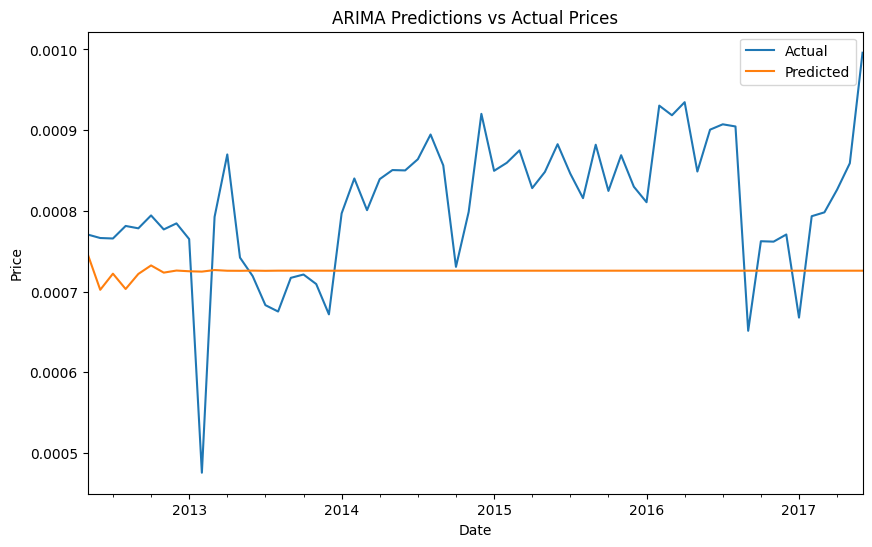

In [ ]:
# Relatively better accuracy than the previous code

# NEW CODE: BETTER ACCURACY

ts_data = ts_data.sort_index()

# Removing duplicates
ts_data = ts_data.groupby(ts_data.index).mean()

ts_data = ts_data.resample('MS').mean()  # 'MS' = Monthly Start frequency
ts_data = ts_data.dropna()

# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()


predictions = arima_result.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"ARIMA RMSE: {rmse}")

# Mean Absolute Error
mae = mean_absolute_error(test, predictions)
print(f"ARIMA MAE: {mae}")

# Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(test, predictions)
print(f"ARIMA MAPE: {mape}")

# Comparing predictions with actual values
arima_results_df = pd.DataFrame({'Actual': test.values, 'Predicted': predictions.values}, index=test.index)

print(arima_results_df.head())
arima_results_df.plot(figsize=(10, 6), title='ARIMA Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


**BOTH ARIMA AND RANDOM FOREST :** Combines the strengths of both models, using ARIMA for time-series forecasting and Random Forest for residual corrections and external influences.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [ ]:
# ARIMA Model
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# ARIMA predictions
arima_predictions = pd.Series(arima_result.forecast(steps=len(test)), index=test.index)

# Residuals
residuals = test - arima_predictions

if 'Date' not in cleaned_data.columns:
    cleaned_data = cleaned_data.reset_index()  #'Date' is a column, not the index

# Filter cleaned_data to match residuals' Date index
aligned_cleaned_data = cleaned_data[cleaned_data['Date'].isin(residuals.index)].set_index('Date')

# Drop NaN values and match indices
X = aligned_cleaned_data[features].dropna()
residual_target = residuals.loc[X.index]  # Now aligned

# Train-test split for residual prediction
X_train, X_test, y_train, y_test = train_test_split(X, residual_target, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest residual predictions
rf_residual_predictions = pd.Series(rf_model.predict(X_test), index=X_test.index)

# Combine Predictions
final_predictions = arima_predictions.loc[X_test.index] + rf_residual_predictions

# Evaluate Hybrid Model
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"Hybrid Model RMSE: {rmse}")

# Mean Absolute Error
mae = mean_absolute_error(test, predictions)
print(f"Hybrid Model MAE: {mae}")

# Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(test, predictions)
print(f"Hybrid Model MAPE: {mape}")

print(final_predictions)

Hybrid Model RMSE: 0.0007297407252373085
Hybrid Model MAE: 0.0001002081415811493
Hybrid Model MAPE: 0.122009844215083
Date
2014-01-01    0.000787
2015-10-01    0.000765
2016-05-01    0.000830
2016-06-01    0.000887
2014-05-01    0.000808
                ...   
2015-11-01    0.000784
2016-11-01    0.000787
2015-07-01    0.000830
2017-01-01    0.000777
2014-07-01    0.000827
Length: 98152, dtype: float64


**RMSE:** 0.00073, indicating minimal prediction error.                                   
**MAE:** 0.0001, showing average deviations are very small.                      
**MAPE:** 12.2%, which is acceptable for commodity price forecasting.

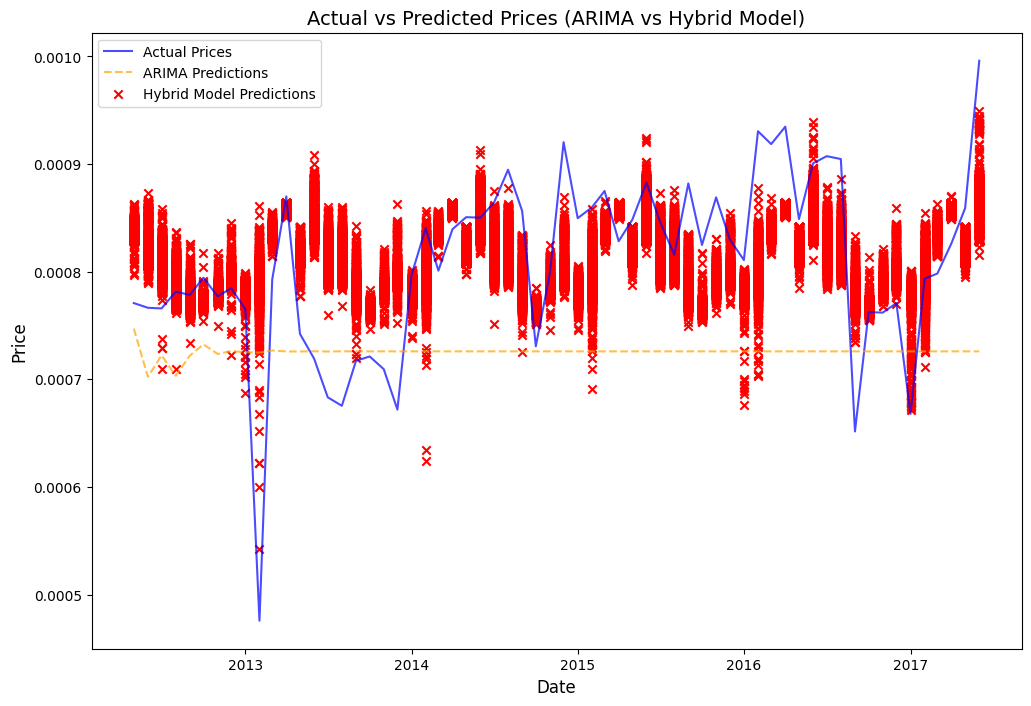

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(test.index, test.values, label='Actual Prices', color='blue', alpha=0.7)
plt.plot(arima_predictions.index, arima_predictions.values, label='ARIMA Predictions', color='orange', linestyle='--', alpha=0.7)

# Plot the Hybrid model predictions (ARIMA + RF residuals)
plt.scatter(final_predictions.index, final_predictions, label='Hybrid Model Predictions', color='red', marker='x')

plt.title('Actual vs Predicted Prices (ARIMA vs Hybrid Model)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='best')

plt.show()
